In [175]:
from scipy.signal import freqz, dbode

import matplotlib.pyplot as plt

import numpy as np
from numpy.polynomial.polynomial import polyval

In [269]:
from scipy.signal import butter, dlti

rb2 = 0.1
b2 = dlti(*butter(2, rb2, fs=1.0), dt=1.0)
wb2, magb2, phaseb2 = dbode(b2)
fb2 = wb2 / (2.0 * np.pi)

Text(0.5, 0.98, 'Response')

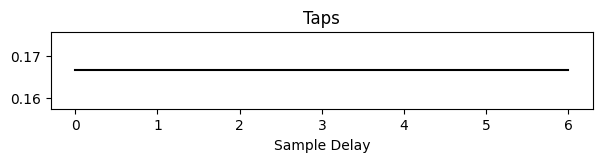

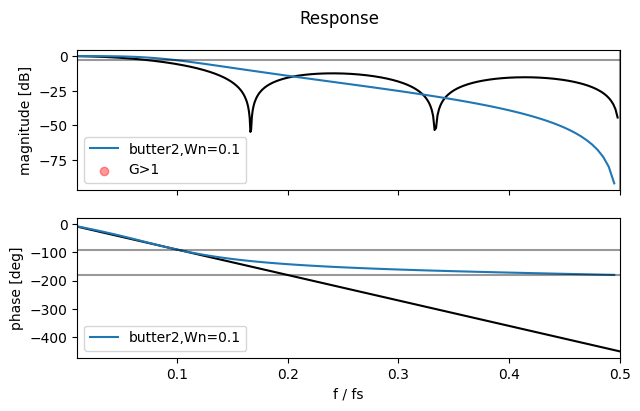

In [365]:
# Make taps
n = 6
tn = np.linspace(1, n+1, n)
tmid = np.mean(tn)
v = tn - tmid
# b = np.sinc(v)
b = np.ones(n)
b = b / sum(b)  # DC gain = 1

# Get frequency response
# 0.01 - 0.49 fraction of samplerate
# w, h = freqz(b)
# w, mag, phase = dbode((b, 1, 1))
nw = 1000
f = np.logspace(-2, np.log10(0.499999), nw)  # f/fs normalized samplerate
w = f * 2.0 * np.pi  # [rad]/samplerate
z = np.exp(-1j * w)
h = polyval(z, b, tensor=False)

mag = 20 * np.log10(np.abs(h))  # Magnitude of complex response vector
phase = np.rad2deg(np.unwrap(np.angle(h), period=3.14))  # Angle of complex response vector

# Clip nans
mag[np.where(mag<-100)] = np.nan
gt1 = np.where(mag > 0.0)


plt.figure(figsize=(7,1))
plt.plot(tn-1, b, color='k')
plt.xlabel("Sample Delay")
plt.title("Taps")

fig, (ax1, ax2) = plt.subplots(2,1, figsize=((7,4)), sharex=True)
ax1.plot(f, mag, color='k')
ax1.plot(fb2, magb2, label=f"butter2,Wn={rb2}")
ax1.scatter(f[gt1], mag[gt1], marker='o', alpha=0.4, color='red', label="G>1")
ax1.set_ylabel("magnitude [dB]")
ax1.set_xlim(1e-2, 0.5)
ax1.axvline(0.5, color='k', alpha=0.4)
ax1.axhline(-3, color='k', alpha=0.4)
ax1.legend()


ax2.plot(f, phase, color='k')
ax2.plot(fb2, phaseb2, label=f"butter2,Wn={rb2}")
ax2.set_ylabel("phase [deg]")
ax2.set_xlabel("f / fs")
ax2.axhline(-90, color='k', alpha=0.4)
ax2.axhline(-180, color='k', alpha=0.4)
ax2.legend()
plt.suptitle("Response")